In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from panoptes_client import Panoptes, Subject, Workflow
%matplotlib inline

In [3]:
data = np.genfromtxt('subject_reducer.csv', delimiter=',', 
                     dtype=[('id', int), ('reducer_key', 'S10'), ('workflow_id', int), 
                            ('subject_id', int), ('agreement', float), 
                            ('most_likely', int), ('num_votes', int)], 
                     usecols=(0, 1, 2, 3, 10, 11, 12), encoding='utf-8', skip_header=1)

In [4]:
consensus_mask = data['reducer_key'] == b'consensus'

data_consensus = data[consensus_mask]

In [5]:
print(len(data_consensus))
print(len(np.unique(data_consensus['subject_id'])))
print(data_consensus['agreement'])

6384
6384
[1.         1.         1.         ... 1.         0.66666667 1.        ]


In [38]:
consensus_agreement = data_consensus['agreement']
consensus_value     = data_consensus['most_likely']
consensus_count     = data_consensus['num_votes']

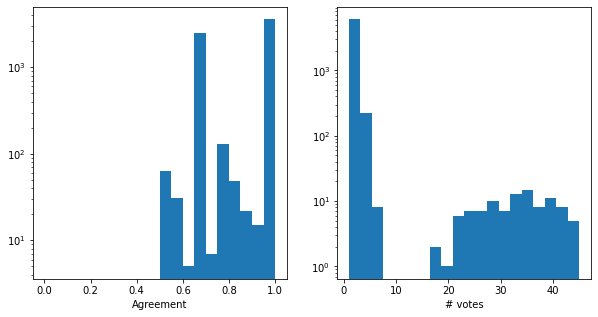

In [7]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].hist(consensus_agreement, 20, range=(0, 1))
axs[0].set_xlabel('Agreement')

axs[1].hist(consensus_count, 20)
axs[1].set_xlabel('# votes')

axs[0].set_yscale('log')
axs[1].set_yscale('log')

plt.show()

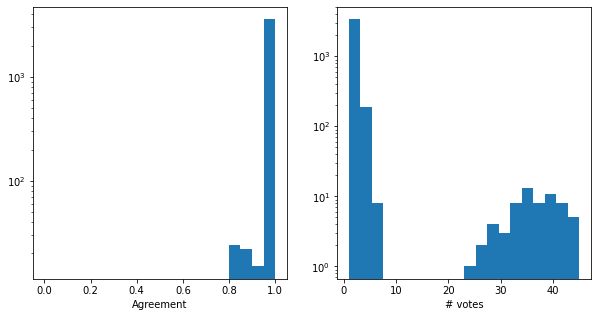

In [8]:
agreement80_mask = consensus_agreement>0.8

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].hist(consensus_agreement[agreement80_mask], 20, range=(0, 1))
axs[0].set_xlabel('Agreement')

axs[1].hist(consensus_count[agreement80_mask], 20)
axs[1].set_xlabel('# votes')

axs[0].set_yscale('log')
axs[1].set_yscale('log')

plt.show()

71


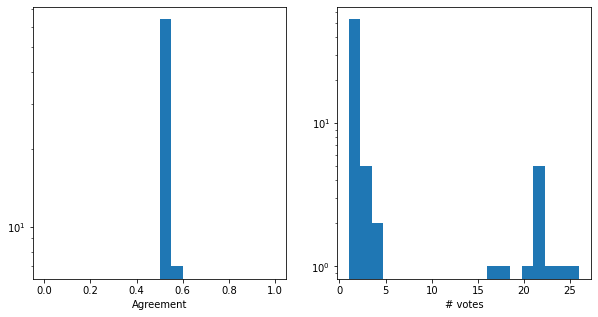

In [9]:
agreement60_mask = consensus_agreement<0.6

fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].hist(consensus_agreement[agreement60_mask], 20, range=(0, 1))
axs[0].set_xlabel('Agreement')

axs[1].hist(consensus_count[agreement60_mask], 20)
axs[1].set_xlabel('# votes')

axs[0].set_yscale('log')
axs[1].set_yscale('log')

print(sum(agreement60_mask))

plt.show()

In [41]:
agreement60_jet_mask = (consensus_agreement<0.6)&(consensus_value==0)

subjects60  = data_consensus[agreement60_jet_mask]['subject_id']
agreement60 = data_consensus[agreement60_jet_mask]['agreement']
count60     = data_consensus[agreement60_jet_mask]['num_votes']
value60     = data_consensus[agreement60_jet_mask]['most_likely']

In [44]:
print(subjects60)
print(len(subjects60))

[62835486 62834039 70439342 70439948 70440818 70440617 70439517 70440784
 70440460 70439293 70440424 70440832 70440739 70440768 70440482 70439418
 70440205 70440772 70439653 70439454 70439136 70440707 70440522 70439875
 70439814 70444183 70444910 70444627 70444812 70444927 70446099 70444938
 70444827 70444529 70444941 70446107]
36


In [52]:
for i, subjecti in enumerate(subjects60):
#     print(i)
    subject = Subject(subjecti)
    location = subject.raw['locations'][0]['image/png']
    
    img = io.imread(location)
    
    fig, axi = plt.subplots(1,1, dpi=150)

    axi.imshow(img)
    axi.axis('off')
    
    axi.set_title(f'# votes: {count60[i]} agreement: {agreement60[i]:.2f}' )
    
    plt.savefig(f'agreement60_jet/{subjecti}.png', facecolor='white', bbox_inches='tight')
    plt.close(fig)
#     plt.show()

In [64]:
agreement80_jet_mask = (consensus_agreement>0.6)&(consensus_value==0)

subjects80  = data_consensus[agreement80_jet_mask]['subject_id']
agreement80 = data_consensus[agreement80_jet_mask]['agreement']
count80     = data_consensus[agreement80_jet_mask]['num_votes']
value80     = data_consensus[agreement80_jet_mask]['most_likely']

retired = np.zeros_like(subjects80)

print(len(subjects80))

1868


In [67]:
for i, subjecti in enumerate(subjects80):
    print("\r [%-20s] %d/%d"%(int(i/len(subjects80)*20)*'=', i, len(subjects80)), end='')
    subject = Subject(subjecti)
    retired_at = subject.subject_workflow_status(18563).raw['retired_at'] 
    if retired_at is None:
        retired[i] = 1
    else:
        retired[i] = 0

 [=================== ] 1867/1868

1856
12


In [63]:
for i, subjecti in enumerate(subjects80[:100]):
#     print(i)
    subject = Subject(subjecti)
    try:
        location = subject.raw['locations'][0]['image/jpeg']
    except KeyError:
        location = subject.raw['locations'][0]['image/png']
    except Exception as e:
        raise e
    retired = subject.subject_workflow_status(18563).raw['retired_at'] 
    if (count80[i] < 3)&(retired is not None):
        print(subjecti)
    img = io.imread(location)
    
    fig, axi = plt.subplots(1,1, dpi=150)

    axi.imshow(img)
    axi.axis('off')
    
    axi.set_title(f'# votes: {count80[i]} agreement: {agreement80[i]:.2f}' )
    
    plt.savefig(f'agreement80_jet/{subjecti}.png', facecolor='white', bbox_inches='tight')
    plt.close(fig)
#     plt.show()

62835269
62835223
62833593
62835851
62835764
62833661
62832801
62832996
62833298
62835771
62833282
62835377
62835855
62835842
62835729
62835537
62833778
62833262
62835876
62835564
62835260
62835568
62832767
62833770
62835779
62833210
62833635
62832677
62835084
62832765
62833627
62832939
62832948
62833690
62835530
62833284
62833648
62834001
62835775
62833624


In [71]:
n_retired = len(np.where(retired==0)[0])
print(n_retired)

n_not_retired = len(np.where(retired==1)[0])
print(n_not_retired)

1856
12


In [75]:
not_retired = retired==1

subjects_nr  = subjects80[not_retired]
agreement_nr = agreement80[not_retired]
count_nr     = count80[not_retired]
value_nr     = value80[not_retired]

In [76]:
for i, subjecti in enumerate(subjects_nr):
#     print(i)
    subject = Subject(subjecti)
    try:
        location = subject.raw['locations'][0]['image/jpeg']
    except KeyError:
        location = subject.raw['locations'][0]['image/png']
    except Exception as e:
        raise e
    retired = subject.subject_workflow_status(18563).raw['retired_at'] 
    if (count80[i] < 3)&(retired is not None):
        print(subjecti)
    img = io.imread(location)
    
    fig, axi = plt.subplots(1,1, dpi=150)

    axi.imshow(img)
    axi.axis('off')
    
    axi.set_title(f'# votes: {count80[i]} agreement: {agreement80[i]:.2f}' )
    
    plt.savefig(f'agreement80_jet/not_retired/{subjecti}.png', facecolor='white', bbox_inches='tight')
    plt.close(fig)
#     plt.show()